Assignment-1
1 Download daily DSEX Index data. You can download it from
https://www.investing.com/indices/
dhaka-stock-exchange-broad-historical-data.
2 Draw a time series plot of the DSEX Index for the last 30 years and
make comments.
3 Find decomposition of the DSEX Index and interpret your results.
4 Draw a time series plot of the DSEX Index for 2021 and make
comments.
5 Draw a plot of SMA(5), SMA(14), SMA(21) with original data.
6 Estimate the trend by using SMA and EMA.
7 Make the detrend lines, and comment on your results.

In [6]:
#load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt 
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt 
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15, 7

import warnings
warnings.filterwarnings('ignore')
import datetime 


In [3]:
#read the dataset
series = pd.read_csv("Dhaka Stock Exchange Broad Historical Data.csv", parse_dates=['Date'] )
series.head()
#series.tail()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-09-21,5100.73,5088.87,5100.73,5088.87,-,0.23%
1,2020-09-20,5088.87,5104.65,5131.05,5083.33,-,-0.31%
2,2020-09-17,5104.65,5116.81,5134.89,5098.06,-,-0.24%
3,2020-09-16,5116.81,5100.54,5128.40,5100.54,-,0.32%
4,2020-09-15,5100.54,5092.14,5101.66,5074.35,-,0.16%


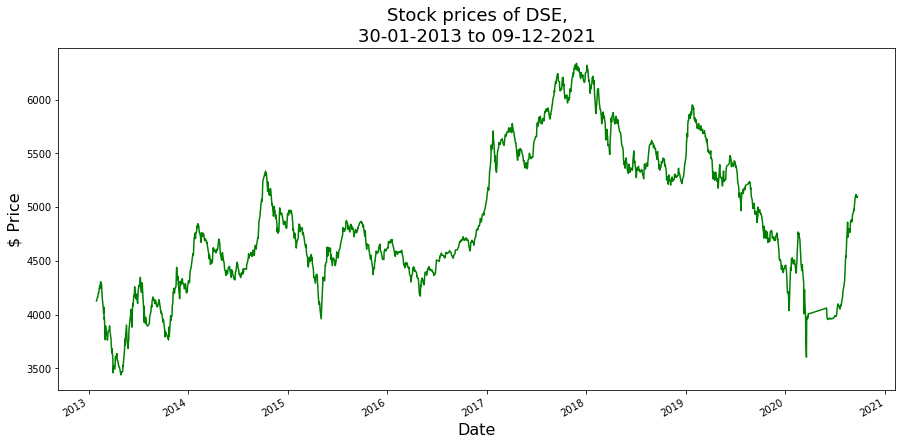

In [4]:
start_date = pd.to_datetime('2013-01-30')
end_date = pd.to_datetime('2021-12-09')
series['Date'] = pd.to_datetime(series['Date'])
new_series = (series['Date'] >= start_date) & (series['Date'] <= end_date)
series1 = series.loc[new_series]
series2 = series1.set_index('Date')
plt.figure(figsize=(15, 7))
plt.title('Stock prices of DSE,\n30-01-2013 to 09-12-2021',
          fontsize=18, color='black')
plt.xlabel("Date", fontsize=16, color='black')
plt.ylabel("$ Price", fontsize=16, color='black')

series2['Price'].plot(color='green')
plt.show()


This time series has Irregular Movements.

In [10]:
import datetime
import pandas_datareader.data as web
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,12,9)



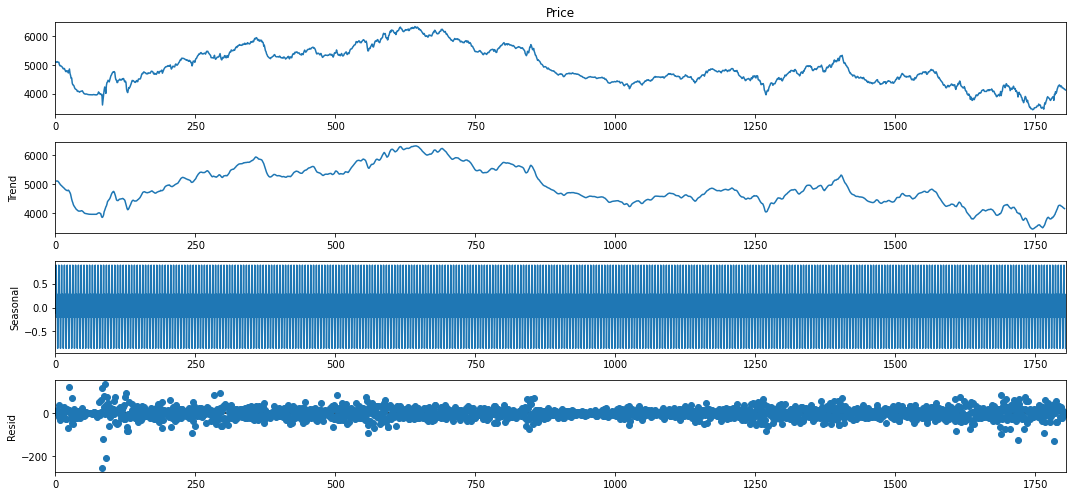

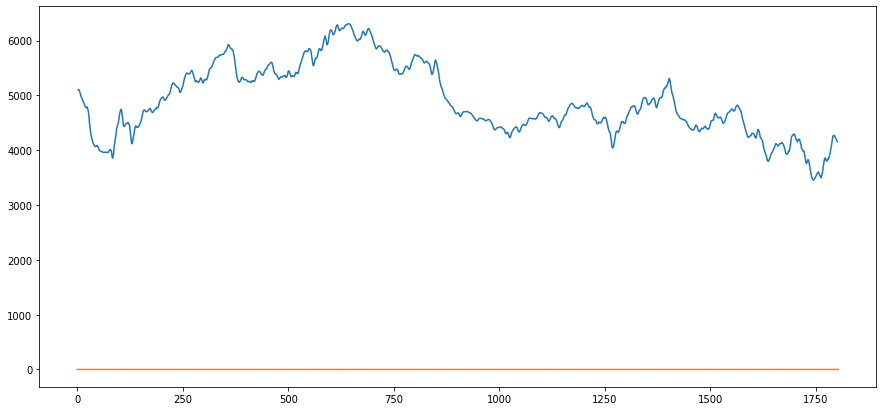

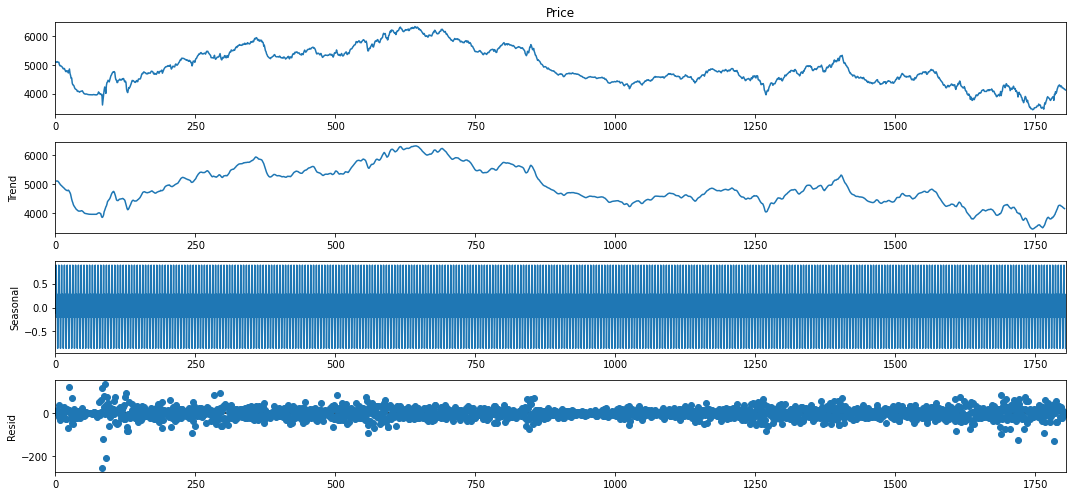

In [4]:
#Find decomposition of the DSEX Index and interpret your results.
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

result = seasonal_decompose(series['Price'], model="additive", period=5)
result.trend.plot()
result.seasonal.plot()
result.plot()

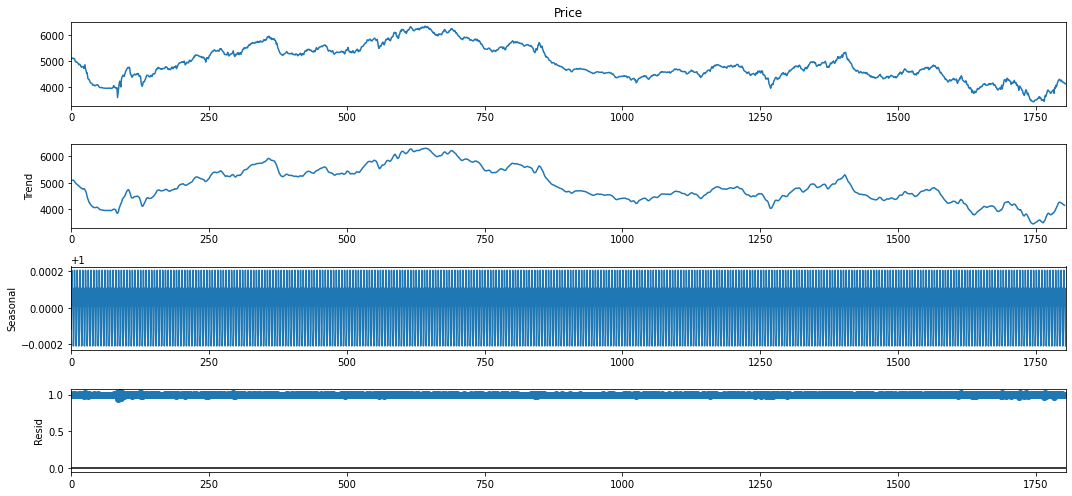

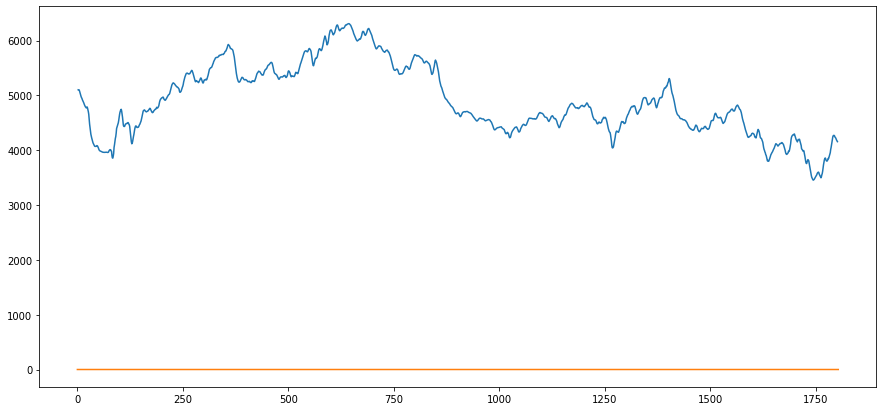

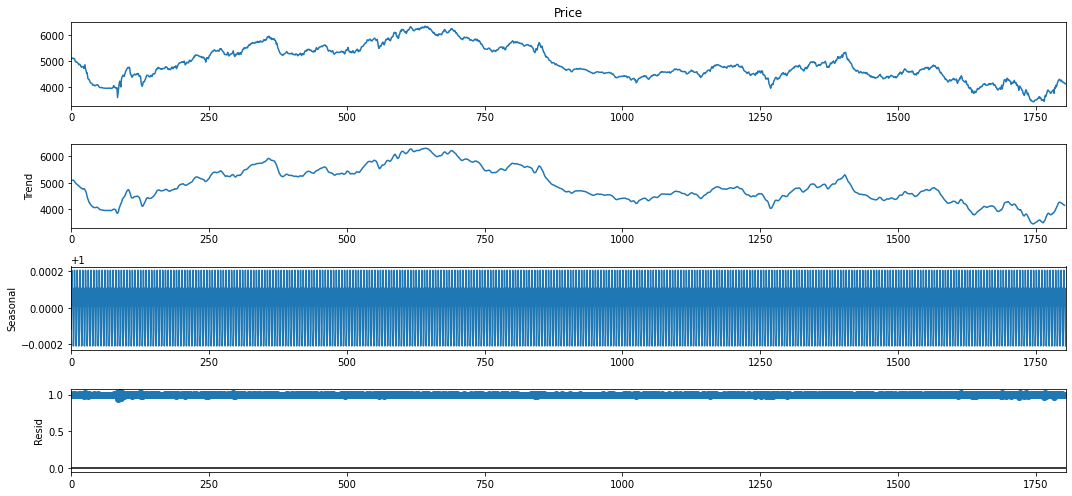

In [5]:
#Find decomposition of the DSEX Index and interpret your results.
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

result = seasonal_decompose(series['Price'], model="multiplicative", period=5)
result.trend.plot()
result.seasonal.plot()
result.plot()

In [6]:
df = pd.read_csv("Dhaka Stock Exchange Broad Historical Data_2021.csv")

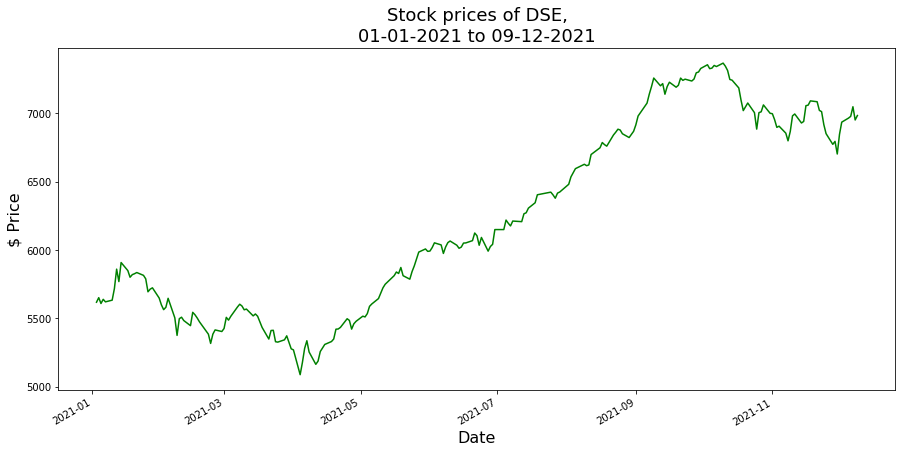

In [7]:
# 4 Draw a time series plot of the DSEX Index for 2021 and make comments.
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2021-12-09')
df['Date'] = pd.to_datetime(df['Date'])
new_df = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df1 = df.loc[new_df]
df2 = df1.set_index('Date')
plt.figure(figsize=(15, 7))
plt.title('Stock prices of DSE,\n01-01-2021 to 09-12-2021',
          fontsize=18, color='black')
plt.xlabel("Date", fontsize=16, color='black')
plt.ylabel("$ Price", fontsize=16, color='black')

df2['Price'].plot(color='green')
plt.show()


The above 2021 stock market 

In [8]:
#Draw a plot of SMA(5), SMA(14), SMA(21) with original data.
series2['SMA_5'] = series2['Price'].rolling(window=5).mean()
series2['SMA_14'] = series2['Price'].rolling(window=14).mean()
series2['SMA_21'] = series2['Price'].rolling(window=21).mean()

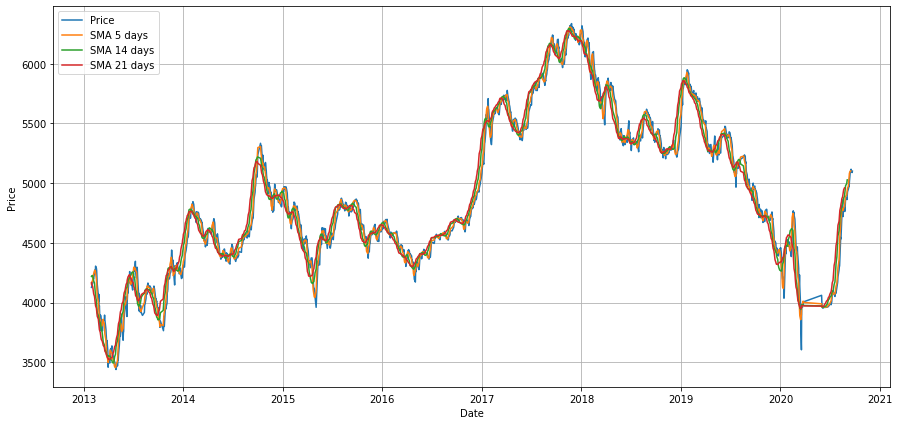

In [9]:
plt.grid(True)
sns.lineplot(data=series2, x="Date",
y="Price",label='Price')
plt.ylabel("Price")
plt.plot(series2['SMA_5'],label='SMA 5 days ')
plt.plot(series2['SMA_14'],label='SMA 14 days')
plt.plot(series2['SMA_21'],label='SMA 21 days')
plt.legend(loc=2)

In [10]:
#6 Estimate the trend by using SMA and EMA.
series2['SMA_21'] = series2['Price'].rolling(window=21).mean()
series2['EMA'] = series2.iloc[:,0].ewm(span=40,adjust=False).mean()
series2.head()

,Price,Open,High,Low,Vol.,Change %,SMA_5,SMA_14,SMA_21,EMA
Date,,,,,,,,,,
2020-09-21,5100.73,5088.87,5100.73,5088.87,-,0.23%,NaN,NaN,NaN,5100.730000
2020-09-20,5088.87,5104.65,5131.05,5083.33,-,-0.31%,NaN,NaN,NaN,5100.151463
2020-09-17,5104.65,5116.81,5134.89,5098.06,-,-0.24%,NaN,NaN,NaN,5100.370904
2020-09-16,5116.81,5100.54,5128.40,5100.54,-,0.32%,NaN,NaN,NaN,5101.172811
2020-09-15,5100.54,5092.14,5101.66,5074.35,-,0.16%,5102.32,NaN,NaN,5101.141942


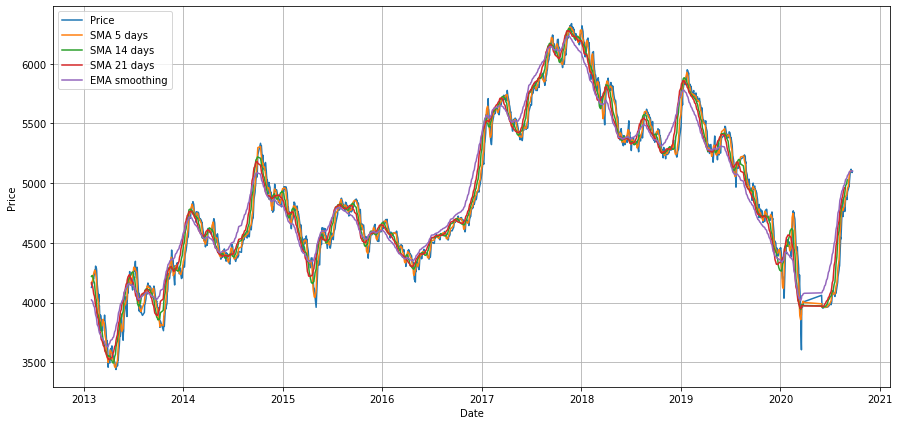

In [11]:
plt.grid(True)
sns.lineplot(data=series2, x="Date",
y="Price",label='Price')
plt.ylabel("Price")
plt.plot(series2['SMA_5'],label='SMA 5 days ')
plt.plot(series2['SMA_14'],label='SMA 14 days')
plt.plot(series2['SMA_21'],label='SMA 21 days')
plt.plot(series2['EMA'],label='EMA smoothing')
plt.legend(loc=2)

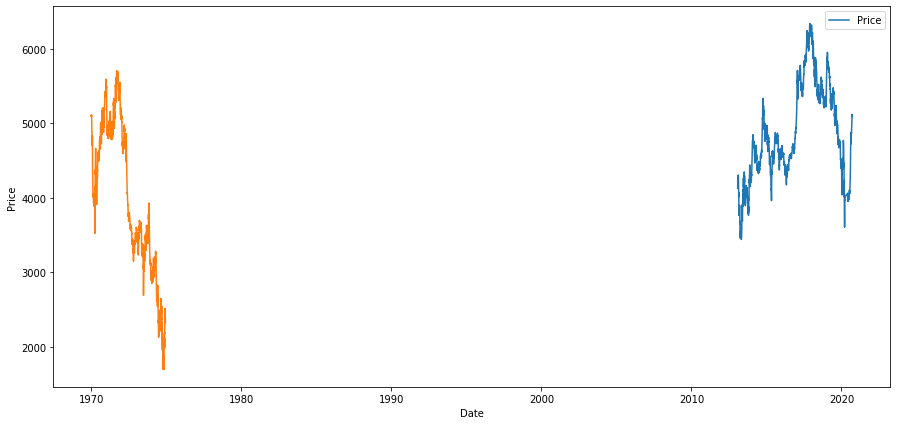

In [13]:
# detrend
#y=series2['Price']
sns.lineplot(data=series2, x="Date",
y="Price",label='Price')
plt.ylabel("Price")
detrended = [y[i]-[i] for i in range(0, len(series2))]
# plot detrended
plt.plot(detrended)
plt.show()